In [1]:
import pandas as pd
import uncertainties as un
from uncertainties import unumpy as unp
from scipy.stats import t
import numpy as np

In [2]:
pd.read_hdf("measurements.h5")

,date,shot,fuel,oxidizer,diluent,t_0,u_t_0,p_0_nom,p_0,u_p_0,phi_nom,phi,u_phi,dil_mf_nom,dil_mf,u_dil_mf,wave_speed,u_wave_speed,cell_size,u_cell_size
0,2020-11-23,0,CH4,N2O,N2,288.854426,3.487385,101325.0,101321.386226,3.933011,1.0,1.070145,0.000710,0.10,0.232712,0.000099,2059.459459,2.811308,10.891977,0.720418
1,2020-12-10,0,CH4,N2O,N2,288.249476,3.487385,101325.0,101441.621314,3.951862,0.4,0.412540,0.000307,0.15,0.250255,0.000054,1795.959596,2.137938,19.830281,1.015184
2,2020-11-25,0,CH4,N2O,N2,289.117440,3.487385,101325.0,101312.656033,3.990513,1.0,1.088798,0.000911,0.20,0.387742,0.000101,1961.029412,2.549002,17.327150,0.677593
3,2020-12-09,0,CH4,N2O,CO2,288.718362,3.487385,101325.0,101432.336834,3.883890,0.4,0.413831,0.000259,0.10,0.102603,0.000052,1783.946488,2.109433,18.495954,0.739494
4,2020-11-12,0,CH4,N2O,N2,290.323806,3.493193,101325.0,101327.131884,4.019152,1.0,1.095292,0.000808,0.20,0.386997,0.000086,1979.220779,2.596513,22.599119,0.708040
5,2020-11-24,0,CH4,N2O,N2,288.278132,3.487385,101325.0,101346.108794,3.790199,1.0,1.065968,0.000612,0.20,0.386095,0.000067,2001.500938,2.655300,16.298812,0.682195
6,2020-12-07,0,CH4,N2O,CO2,288.309842,3.487385,101325.0,101456.894590,3.611667,0.7,0.737862,0.000535,0.10,0.104241,0.000099,1932.608696,2.475653,9.931973,0.728912
7,2020-12-27,0,CH4,N2O,N2,289.972435,3.487385,101325.0,101318.082379,4.589153,1.0,1.065876,0.000484,0.20,0.384576,0.000060,1990.298507,2.625660,17.410134,0.984408
8,2020-11-26,1,CH4,N2O,CO2,290.771442,3.487385,101325.0,101377.988467,3.296341,0.4,0.424658,0.000571,0.20,0.208138,0.000095,1641.230769,1.785424,42.102948,0.966665
9,2020-11-24,1,CH4,N2O,N2,289.064064,3.487385,101325.0,101383.584331,4.136975,0.7,0.735324,0.000454,0.15,0.293383,0.000066,1950.274223,2.521119,18.891688,0.674749


In [5]:
data = pd.read_hdf("simulated_and_measured.h5", key="data_fixed_uncert")
data

,diluent,phi_nom,dil_mf_nom,p_0,u_p_0,t_0,phi,u_phi,dil_mf,u_dil_mf,wave_speed,u_wave_speed,cell_size_measured,u_cell_size_measured,cell_size_gavrikov,cell_size_ng,cell_size_westbrook
0,CO2,0.4,0.10,101393.842884,2.307000,289.846188,0.419182,0.000208,0.103943,0.000040,1780.064483,1.212763,17.711596,2.065540,770.810052,74.459337,40.577703
1,CO2,0.4,0.15,101400.200470,1.609842,290.021614,0.416662,0.000215,0.154795,0.000036,1742.324854,1.161985,26.122865,2.063038,2328.318780,137.733125,76.176883
2,CO2,0.4,0.20,101383.316513,1.976709,290.005443,0.425508,0.000378,0.207642,0.000063,1680.937965,1.326527,45.265852,7.552310,7173.643295,262.627217,148.643042
3,CO2,0.7,0.10,101393.617108,2.121143,289.767941,0.735369,0.000243,0.104023,0.000045,1944.385714,1.446872,11.744907,2.280838,275.832035,41.773144,24.192077
4,CO2,0.7,0.15,101412.528953,2.179424,289.308769,0.730354,0.000250,0.154600,0.000045,1884.805654,1.665023,14.199823,6.516796,777.986099,72.212132,43.211558
5,CO2,0.7,0.20,101412.244820,1.938748,290.890143,0.739247,0.000282,0.207012,0.000045,1808.159887,1.251217,22.565446,2.059861,2342.272709,127.963220,79.797353
6,CO2,1.0,0.10,101396.288279,2.719599,290.170199,1.048230,0.000235,0.103722,0.000039,2030.771107,1.578345,10.729874,1.757072,213.161962,33.742735,19.590121
7,CO2,1.0,0.15,101404.272743,1.800340,290.141360,1.048723,0.000231,0.154530,0.000037,1965.920228,1.479180,13.662187,2.065471,668.234272,56.702087,34.275813
8,CO2,1.0,0.20,101410.128009,1.557379,290.441929,1.052847,0.000288,0.206571,0.000042,1907.275986,1.392106,18.601504,2.084832,2103.742085,98.650499,62.648736
9,N2,0.4,0.10,101368.606788,2.121188,289.359526,0.416727,0.000224,0.180426,0.000041,1880.070432,1.657319,15.263125,7.642898,275.935516,47.345764,24.757695


DELETE THIS

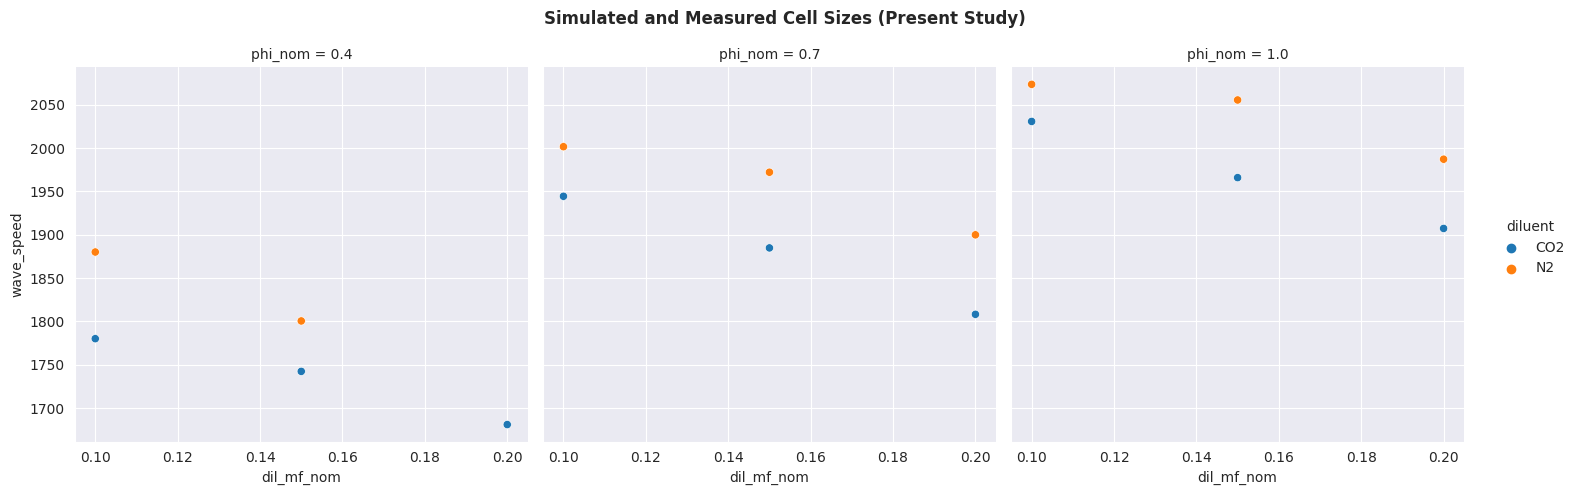

In [15]:
import seaborn as sns
sns.set_style("darkgrid")

uncert_plot_args = dict(
    x="dil_mf_nom",
    ls="None",
    linewidth=0.5,
    zorder=1,
    capsize=4,
    alpha=0.4,
)

grid = sns.relplot(
    x="dil_mf_nom",
    y="wave_speed",
    col="phi_nom",
    hue="diluent",
    data=data,
    kind="scatter",
)

grid.fig.suptitle("Simulated and Measured Cell Sizes (Present Study)", weight="bold")
grid.tight_layout()

In [4]:
meas = pd.read_hdf("measurements.h5")

In [17]:
for ((phi, dil_mf, diluent), data) in meas.groupby(["phi_nom", "dil_mf_nom", "diluent"]):
    cell_size = unp.uarray(data["cell_size"], data["u_cell_size"]).mean()
    print(phi, dil_mf, diluent, cell_size.nominal_value, cell_size.std_dev, t.ppf(0.975, len(data)-1), cell_size.std_dev * t.ppf(0.975, len(data)-1))

0.4 0.1 CO2 17.711596296150102 0.4800620540248619 4.302652729911275 2.065540307276886
0.4 0.1 N2 15.263125413570958 0.6015090842770171 12.706204736432095 7.642897575647567
0.4 0.15 CO2 26.122865133899523 0.47948053598174406 4.302652729911275 2.063038237081172
0.4 0.15 N2 20.878385301241785 0.6987038390753644 12.706204736432095 8.877874029422683
0.4 0.2 CO2 45.26585178267631 0.5943796679779967 12.706204736432095 7.552309752500958
0.7 0.1 CO2 11.74490718655443 0.5301003459292787 4.302652729911275 2.280837700539522
0.7 0.1 N2 12.370169699746416 0.5024019536868911 12.706204736432095 6.383622083529114
0.7 0.15 CO2 14.19982274760758 0.5128829471393683 12.706204736432095 6.516795732177494
0.7 0.15 N2 18.309480192351728 0.4972466814921736 12.706204736432095 6.3181181395509975
0.7 0.2 CO2 22.56544553366115 0.47874213447706115 4.302652729911275 2.059861151831278
0.7 0.2 N2 23.968649307265146 0.6126928589485838 12.706204736432095 7.785000906350618
1.0 0.1 CO2 10.729874045826493 0.4083694350325371

In [32]:
sim_meas = pd.read_hdf("simulated_and_measured.h5")
for ((phi, dil_mf, diluent), data) in meas.groupby(["phi_nom", "dil_mf_nom", "diluent"]):
    cell_size = unp.uarray(data["cell_size"], data["u_cell_size"]).mean()
    fixed_uncert = cell_size.std_dev * t.ppf(0.975, len(data)-1)
    sim_meas.loc[
        (sim_meas["phi_nom"] == phi) & (sim_meas["dil_mf_nom"] == dil_mf) & (sim_meas["diluent"] == diluent),
        "u_cell_size_measured",
    ] = fixed_uncert
    
with pd.HDFStore("simulated_and_measured.h5") as store:
    store.put("data_fixed_uncert", sim_meas)